In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('/content/telecom_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
print (df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()])

      customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
488   4472-LVYGI  Female              0  ...          52.55                  No
753   3115-CZMZD    Male              0  ...          20.25                  No
936   5709-LVOEQ  Female              0  ...          80.85                  No
1082  4367-NUYAO    Male              0  ...          25.75                  No
1340  1371-DWPAZ  Female              0  ...          56.05                  No
3331  7644-OMVMY    Male              0  ...          19.85                  No
3826  3213-VVOLG    Male              0  ...          25.35                  No
4380  2520-SGTTA  Female              0  ...          20.00                  No
5218  2923-ARZLG    Male              0  ...          19.70                  No
6670  4075-WKNIU  Female              0  ...          73.35                  No
6754  2775-SEFEE    Male              0  ...          61.90                  No

[11 rows x 21 columns]


In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [10]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(['int64','float64'])

In [11]:
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
  le=LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
df_new = pd.concat([df_cat,df_num],axis=1)
df_new

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,5365,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0,1,29.85,29.85
1,3953,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0,34,56.95,1889.50
2,2558,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0,2,53.85,108.15
3,5524,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0,45,42.30,1840.75
4,6500,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4843,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0,0,24,84.80,1990.50
7039,1524,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0,0,72,103.20,7362.90
7040,3358,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0,0,11,29.60,346.45
7041,5923,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1,1,4,74.40,306.60


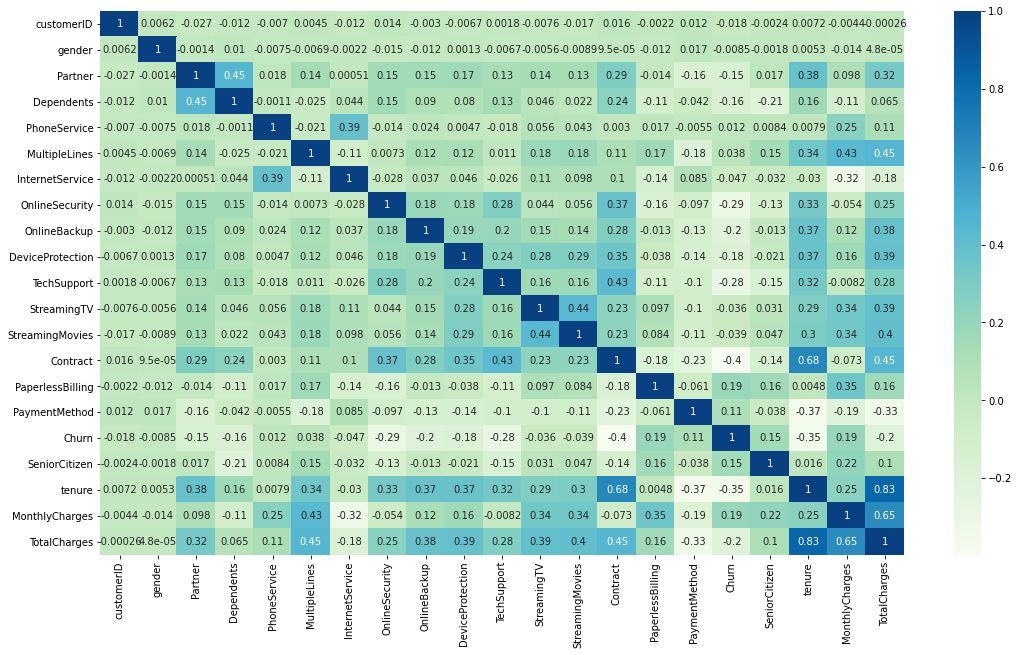

In [13]:
plt.figure(figsize=(18,10))
sns.heatmap(df_new.corr(),annot=True,cmap='GnBu')
plt.show()

In [14]:
df_new = df_new.drop(['customerID','gender'],axis=1)

In [15]:
df_new['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [16]:
x = df_new.drop("Churn",axis=1)
y = df_new["Churn"]


In [17]:
x.shape

(7032, 18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


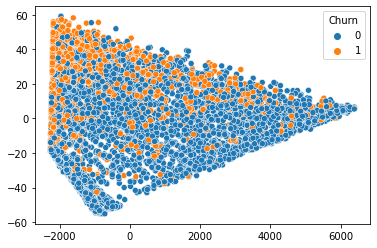

In [18]:
pc = PCA(n_components=2,random_state=1)
components = pc.fit_transform(x,y)
pc1 = components[:,0]
pc2 = components[:,1]
sns.scatterplot(pc1,pc2,hue=y)

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=82)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros= RandomOverSampler(random_state=1)
xsample,ysample=ros.fit_resample(xtrain,ytrain)

In [21]:
pd.Series(ysample).value_counts()

1    3854
0    3854
dtype: int64

In [22]:
ss = StandardScaler()

X_train_ss = ss.fit_transform(xsample)
X_test_ss = ss.transform(xtest)

In [23]:
model = Sequential()
model.add(Dense(128, input_dim=18, activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy")
trained_model = model.fit(X_train_ss,ysample,epochs=100)


Epoch 1/100
241/241 [==============================] - 2s 3ms/step - loss: 0.5093
Epoch 2/100
241/241 [==============================] - 1s 3ms/step - loss: 0.4764
Epoch 3/100
241/241 [==============================] - 1s 3ms/step - loss: 0.4547
Epoch 4/100
241/241 [==============================] - 1s 2ms/step - loss: 0.4312
Epoch 5/100
241/241 [==============================] - 1s 2ms/step - loss: 0.4065
Epoch 6/100
241/241 [==============================] - 1s 3ms/step - loss: 0.3769
Epoch 7/100
241/241 [==============================] - 1s 2ms/step - loss: 0.3541
Epoch 8/100
241/241 [==============================] - 1s 3ms/step - loss: 0.3287
Epoch 9/100
241/241 [==============================] - 1s 3ms/step - loss: 0.3074
Epoch 10/100
241/241 [==============================] - 1s 2ms/step - loss: 0.2869
Epoch 11/100
241/241 [==============================] - 1s 2ms/step - loss: 0.2711
Epoch 12/100
241/241 [==============================] - 1s 2ms/step - loss: 0.2621
Epoch 13/100


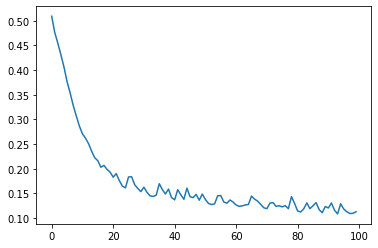

In [24]:
plt.plot(trained_model.history['loss'])

In [25]:
y_pred = model.predict(X_test_ss)

In [26]:
y_pred = np.where(y_pred >= 0.5,1,0)


In [27]:
print(f"{classification_report(ytest,y_pred)}")

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1309
           1       0.51      0.52      0.52       449

    accuracy                           0.75      1758
   macro avg       0.67      0.68      0.67      1758
weighted avg       0.75      0.75      0.75      1758

